In [1]:
import os
import yaml
import pandas as pd
from collections import defaultdict

# Set your root data folder
ROOT_DIR = 'C:/Users/dilan/Desktop/guvi_project/Untitled Folder'  # Change this to your folder path

# Prepare storage for each ticker
ticker_data = defaultdict(list)

# Traverse month folders and YAML files
for month_folder in sorted(os.listdir(ROOT_DIR)):
    month_path = os.path.join(ROOT_DIR, month_folder)
    if not os.path.isdir(month_path):
        continue

    for day_file in sorted(os.listdir(month_path)):
        if day_file.endswith('.yaml') or day_file.endswith('.yml'):
            day_path = os.path.join(month_path, day_file)

            # Read the YAML file
            with open(day_path, 'r') as file:
                try:
                    day_data = yaml.safe_load(file)
                    if isinstance(day_data, list):
                        for record in day_data:
                            ticker = record.get('Ticker')
                            if ticker:
                                ticker_data[ticker].append(record)
                except Exception as e:
                    print(f"Error reading {day_path}: {e}")

# Output folder for CSVs
OUTPUT_DIR = 'csv_output'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Write each ticker's data to CSV
for ticker, records in ticker_data.items():
    df = pd.DataFrame(records)
    df.drop(columns=['Ticker'], inplace=True)  # Optional
    df.to_csv(os.path.join(OUTPUT_DIR, f"{ticker}.csv"), index=False)

print(f"✅ Done. CSVs saved in folder: {OUTPUT_DIR}")


✅ Done. CSVs saved in folder: csv_output


In [2]:
import pandas as pd
import os

folder = 'C:/Users/dilan/Desktop/guvi_project/Untitled Folder/csv_output'
all_dfs = []

for file in os.listdir(folder):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(folder, file))
        df['stock_name'] = os.path.splitext(file)[0]
        all_dfs.append(df)

merged = pd.concat(all_dfs)
merged.to_csv('merged_stocks.csv', index=False)


In [3]:
merged

,close,date,high,low,month,open,volume,stock_name
0,2387.25,2023-10-03 05:30:00,2424.90,2372.00,2023-10,2418.00,2019899,ADANIENT
1,2464.95,2023-10-04 05:30:00,2502.75,2392.25,2023-10,2402.20,2857377,ADANIENT
2,2466.35,2023-10-05 05:30:00,2486.50,2446.40,2023-10,2477.95,1132455,ADANIENT
3,2478.10,2023-10-06 05:30:00,2514.95,2466.05,2023-10,2466.35,1510035,ADANIENT
4,2442.60,2023-10-09 05:30:00,2459.70,2411.30,2023-10,2440.00,1408224,ADANIENT
...,...,...,...,...,...,...,...,...
279,566.70,2024-11-14 05:30:00,574.55,564.20,2024-11,568.95,4891760,WIPRO
280,552.85,2024-11-18 05:30:00,566.70,540.30,2024-11,566.70,7644882,WIPRO
281,562.00,2024-11-19 05:30:00,569.80,554.70,2024-11,556.00,6459889,WIPRO
282,557.15,2024-11-21 05:30:00,567.60,555.30,2024-11,562.00,5836304,WIPRO


In [4]:
df = merged.copy()

In [5]:
df

,close,date,high,low,month,open,volume,stock_name
0,2387.25,2023-10-03 05:30:00,2424.90,2372.00,2023-10,2418.00,2019899,ADANIENT
1,2464.95,2023-10-04 05:30:00,2502.75,2392.25,2023-10,2402.20,2857377,ADANIENT
2,2466.35,2023-10-05 05:30:00,2486.50,2446.40,2023-10,2477.95,1132455,ADANIENT
3,2478.10,2023-10-06 05:30:00,2514.95,2466.05,2023-10,2466.35,1510035,ADANIENT
4,2442.60,2023-10-09 05:30:00,2459.70,2411.30,2023-10,2440.00,1408224,ADANIENT
...,...,...,...,...,...,...,...,...
279,566.70,2024-11-14 05:30:00,574.55,564.20,2024-11,568.95,4891760,WIPRO
280,552.85,2024-11-18 05:30:00,566.70,540.30,2024-11,566.70,7644882,WIPRO
281,562.00,2024-11-19 05:30:00,569.80,554.70,2024-11,556.00,6459889,WIPRO
282,557.15,2024-11-21 05:30:00,567.60,555.30,2024-11,562.00,5836304,WIPRO


In [6]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Calculate yearly first and last close prices
df_sorted = df.sort_values(by=['stock_name', 'year', 'date'])

returns = df_sorted.groupby(['stock_name', 'year']).agg(
    first_close=('close', 'first'),
    last_close=('close', 'last')
).reset_index()

# Calculate yearly return
returns['yearly_return'] = (returns['last_close'] - returns['first_close']) / returns['first_close'] * 100

# Calculate average return across all years per stock
avg_returns = returns.groupby('stock_name')['yearly_return'].mean().reset_index()

# Top 10 Green Stocks
top_10_green = avg_returns.sort_values(by='yearly_return', ascending=False).head(10)

# Top 10 Loss Stocks
top_10_loss = avg_returns.sort_values(by='yearly_return').head(10)

# Market Summary
avg_returns['status'] = avg_returns['yearly_return'].apply(lambda x: 'green' if x > 0 else 'red')
green_count = (avg_returns['status'] == 'green').sum()
red_count = (avg_returns['status'] == 'red').sum()

# Average close price across all records
avg_price = df['close'].mean()

# Average volume
avg_volume = df['volume'].mean()

# Output
print("🔼 Top 10 Green Stocks:\n", top_10_green)
print("\n🔽 Top 10 Loss Stocks:\n", top_10_loss)
print(f"\n✅ Green Stocks: {green_count} | ❌ Red Stocks: {red_count}")
print(f"\n📊 Average Close Price: {avg_price:.2f}")
print(f"📈 Average Volume: {avg_volume:.0f}")

🔼 Top 10 Green Stocks:
     stock_name  yearly_return
47       TRENT      84.984120
30         M&M      44.688799
8          BEL      42.089719
5   BAJAJ-AUTO      38.496571
9   BHARTIARTL      33.230727
35   POWERGRID      30.147262
10        BPCL      29.242248
20  HEROMOTOCO      26.836904
40   SUNPHARMA      26.396795
15   EICHERMOT      23.553059

🔽 Top 10 Loss Stocks:
     stock_name  yearly_return
24  INDUSINDBK     -13.086795
3   ASIANPAINT      -9.883372
7   BAJFINANCE      -8.228887
0     ADANIENT      -2.142575
22  HINDUNILVR       0.004382
32   NESTLEIND       0.606965
28   KOTAKBANK       1.373383
6   BAJAJFINSV       1.742368
46       TITAN       2.486291
26         ITC       3.246269

✅ Green Stocks: 46 | ❌ Red Stocks: 4

📊 Average Close Price: 2449.42
📈 Average Volume: 6833475


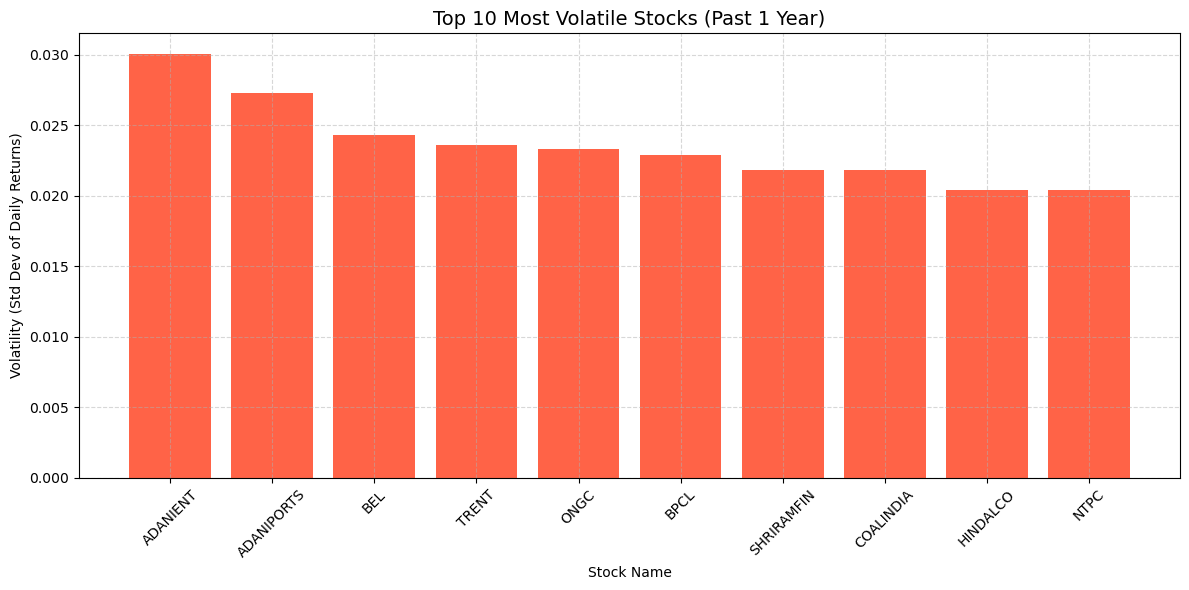

In [8]:

import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['stock_name', 'date'])

# Filter only the most recent 1 year of data (from latest date)
one_year_ago = df['date'].max() - pd.DateOffset(days=365)
df_last_year = df[df['date'] >= one_year_ago].copy()

# Calculate daily return per stock
df_last_year['daily_return'] = df_last_year.groupby('stock_name')['close'].pct_change()

# Calculate standard deviation of daily returns = volatility
volatility = df_last_year.groupby('stock_name')['daily_return'].std().reset_index()
volatility.columns = ['stock_name', 'volatility']

# Top 10 most volatile stocks
top_10_volatility = volatility.sort_values(by='volatility', ascending=False).head(10)

# 📊 Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_volatility['stock_name'], top_10_volatility['volatility'], color='tomato')
plt.title('Top 10 Most Volatile Stocks (Past 1 Year)', fontsize=14)
plt.xlabel('Stock Name')
plt.ylabel('Volatility (Std Dev of Daily Returns)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


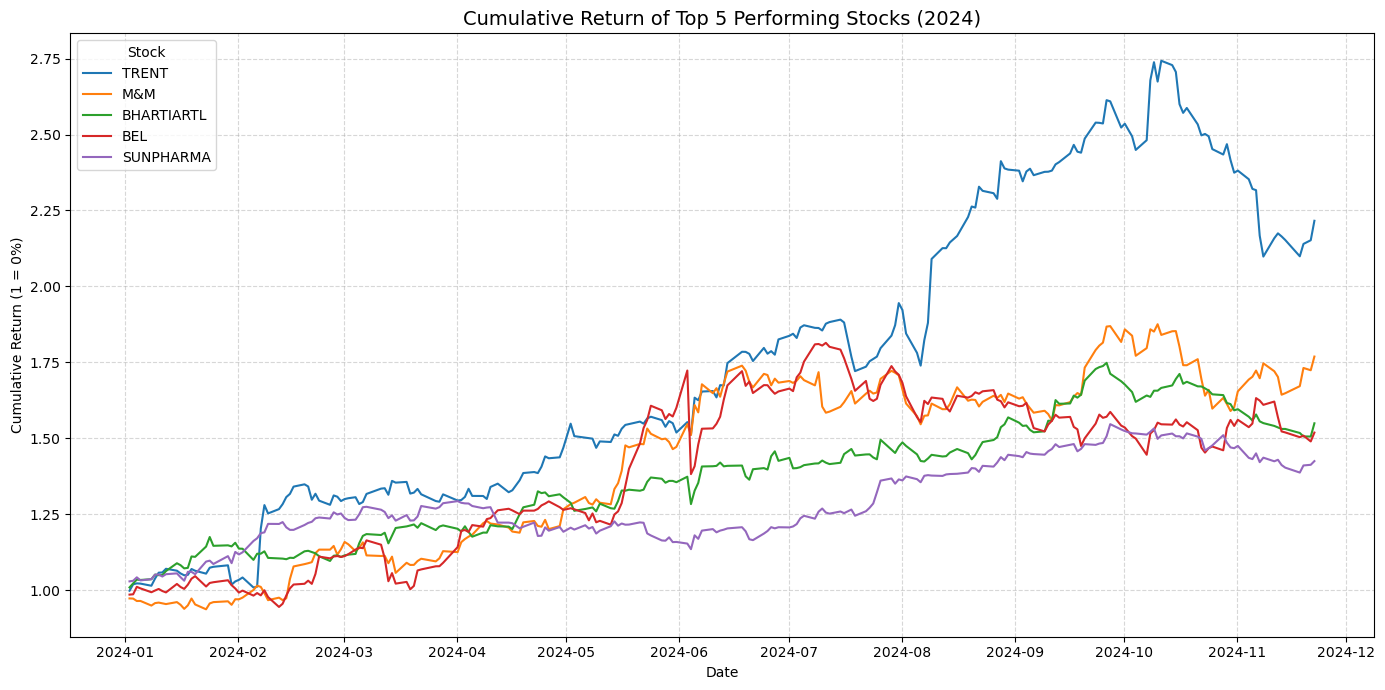

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime and sorting
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['stock_name', 'date'])

# Filter for current year
current_year = df['date'].max().year
df_year = df[df['date'].dt.year == current_year].copy()

# Calculate daily return
df_year['daily_return'] = df_year.groupby('stock_name')['close'].pct_change()

# ✅ FIX: Use transform instead of apply for index alignment
df_year['cumulative_return'] = df_year.groupby('stock_name')['daily_return'].transform(lambda x: (1 + x).cumprod())

# Get final cumulative return per stock
final_returns = df_year.groupby('stock_name').agg(final_cum_return=('cumulative_return', 'last')).reset_index()
top_5_stocks = final_returns.sort_values(by='final_cum_return', ascending=False).head(5)['stock_name']

# Filter data for top 5 stocks
df_top5 = df_year[df_year['stock_name'].isin(top_5_stocks)]

# 📈 Plot cumulative return
plt.figure(figsize=(14, 7))
for stock in top_5_stocks:
    stock_data = df_top5[df_top5['stock_name'] == stock]
    plt.plot(stock_data['date'], stock_data['cumulative_return'], label=stock)

plt.title(f'Cumulative Return of Top 5 Performing Stocks ({current_year})', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Cumulative Return (1 = 0%)')
plt.legend(title='Stock')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [12]:
df

,close,date,high,low,month,open,volume,stock_name,year
0,2387.25,2023-10-03 05:30:00,2424.90,2372.00,2023-10,2418.00,2019899,ADANIENT,2023
1,2464.95,2023-10-04 05:30:00,2502.75,2392.25,2023-10,2402.20,2857377,ADANIENT,2023
2,2466.35,2023-10-05 05:30:00,2486.50,2446.40,2023-10,2477.95,1132455,ADANIENT,2023
3,2478.10,2023-10-06 05:30:00,2514.95,2466.05,2023-10,2466.35,1510035,ADANIENT,2023
4,2442.60,2023-10-09 05:30:00,2459.70,2411.30,2023-10,2440.00,1408224,ADANIENT,2023
...,...,...,...,...,...,...,...,...,...
279,566.70,2024-11-14 05:30:00,574.55,564.20,2024-11,568.95,4891760,WIPRO,2024
280,552.85,2024-11-18 05:30:00,566.70,540.30,2024-11,566.70,7644882,WIPRO,2024
281,562.00,2024-11-19 05:30:00,569.80,554.70,2024-11,556.00,6459889,WIPRO,2024
282,557.15,2024-11-21 05:30:00,567.60,555.30,2024-11,562.00,5836304,WIPRO,2024


C:\Users\dilan\AppData\Local\Temp\ipykernel_27272\1817786999.py:47: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\dilan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


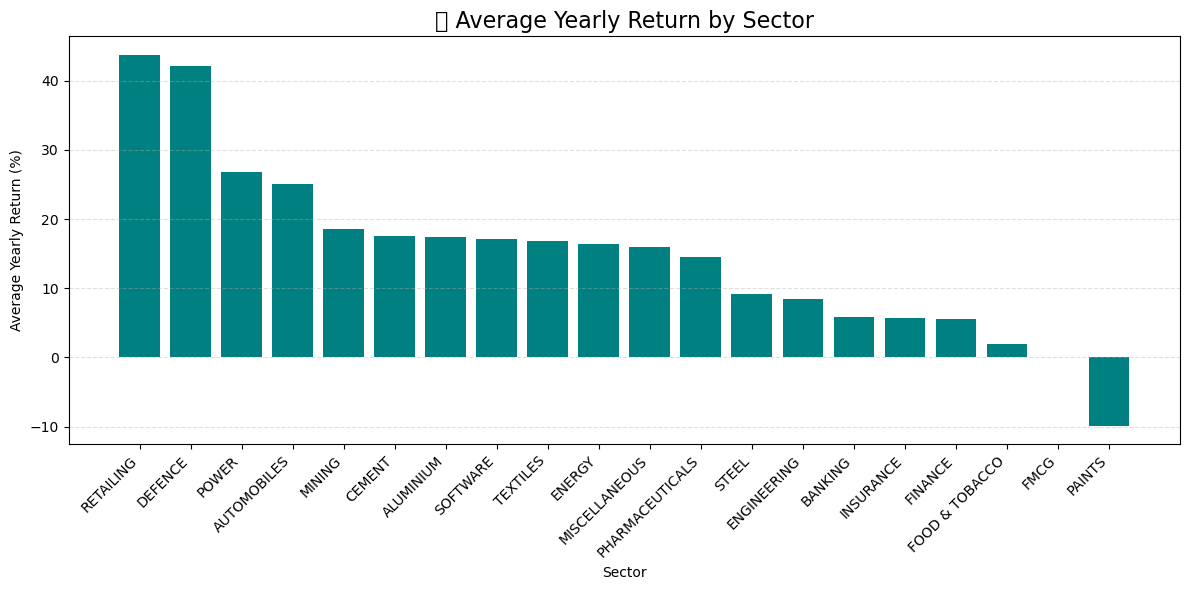

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# === STEP 1: Load and Prepare Sector Data ===
sector_df = pd.read_csv('C:/Users/dilan/Desktop/guvi_project/Untitled Folder/Sector_data - Sheet1.csv')  # Adjust path if needed

# Extract the actual stock symbol from 'Symbol' column
# Assuming it's after colon or the full string
sector_df['stock_name'] = sector_df['Symbol'].str.split(':').str[-1].str.strip()
sector_df = sector_df[['stock_name', 'sector']]

# === STEP 2: Prepare Main Stock Data ===
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['stock_name', 'date'])
df['year'] = df['date'].dt.year

# === STEP 3: Calculate Yearly Returns ===
yearly_returns = df.groupby(['stock_name', 'year']).agg(
    first_close=('close', 'first'),
    last_close=('close', 'last')
).reset_index()

yearly_returns['yearly_return'] = (
    (yearly_returns['last_close'] - yearly_returns['first_close']) / yearly_returns['first_close']
) * 100

# === STEP 4: Merge with Sector Info ===
yearly_returns = yearly_returns.merge(sector_df, on='stock_name', how='left')
yearly_returns = yearly_returns.dropna(subset=['sector'])

# === STEP 5: Calculate Sector-Wise Average Return ===
sector_returns = (
    yearly_returns.groupby('sector')['yearly_return']
    .mean()
    .reset_index()
    .sort_values(by='yearly_return', ascending=False)
)


plt.figure(figsize=(12, 6))
plt.bar(sector_returns['sector'], sector_returns['yearly_return'], color='teal')
plt.title('📊 Average Yearly Return by Sector', fontsize=16)
plt.xlabel('Sector')
plt.ylabel('Average Yearly Return (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Optional: Export
sector_returns.to_csv('sector_performance_summary.csv', index=False)

C:\Users\dilan\AppData\Local\Temp\ipykernel_27272\798596390.py:28: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\dilan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


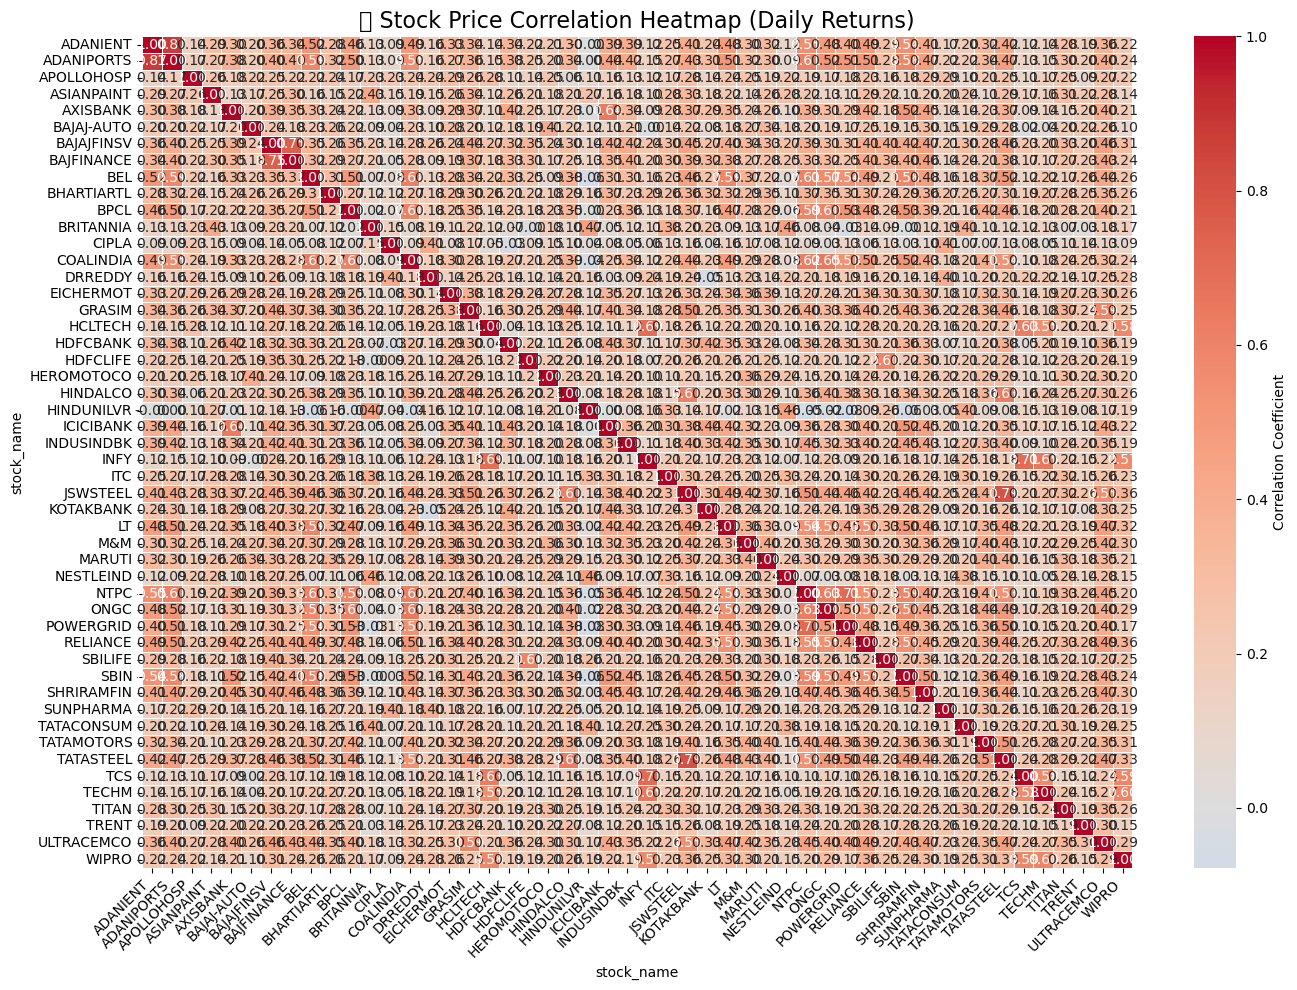

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === STEP 1: Prepare your data ===
# Assuming 'df' is your main DataFrame with columns: 'date', 'stock_name', 'close'

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['stock_name', 'date'])

# === STEP 2: Pivot the data to wide format ===
# Rows = dates, Columns = stock names, Values = close prices
pivot_df = df.pivot_table(index='date', columns='stock_name', values='close')

# === STEP 3: Calculate daily percentage returns ===
returns_df = pivot_df.pct_change()

# === STEP 4: Compute the correlation matrix ===
corr_matrix = returns_df.corr()

# === STEP 5: Plot the heatmap ===
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('📈 Stock Price Correlation Heatmap (Daily Returns)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# === STEP 6: Optional - Export to CSV ===
corr_matrix.to_csv('stock_correlation_matrix.csv')


C:\Users\dilan\AppData\Local\Temp\ipykernel_27272\722997576.py:55: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\dilan\AppData\Local\Temp\ipykernel_27272\722997576.py:55: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\dilan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dilan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


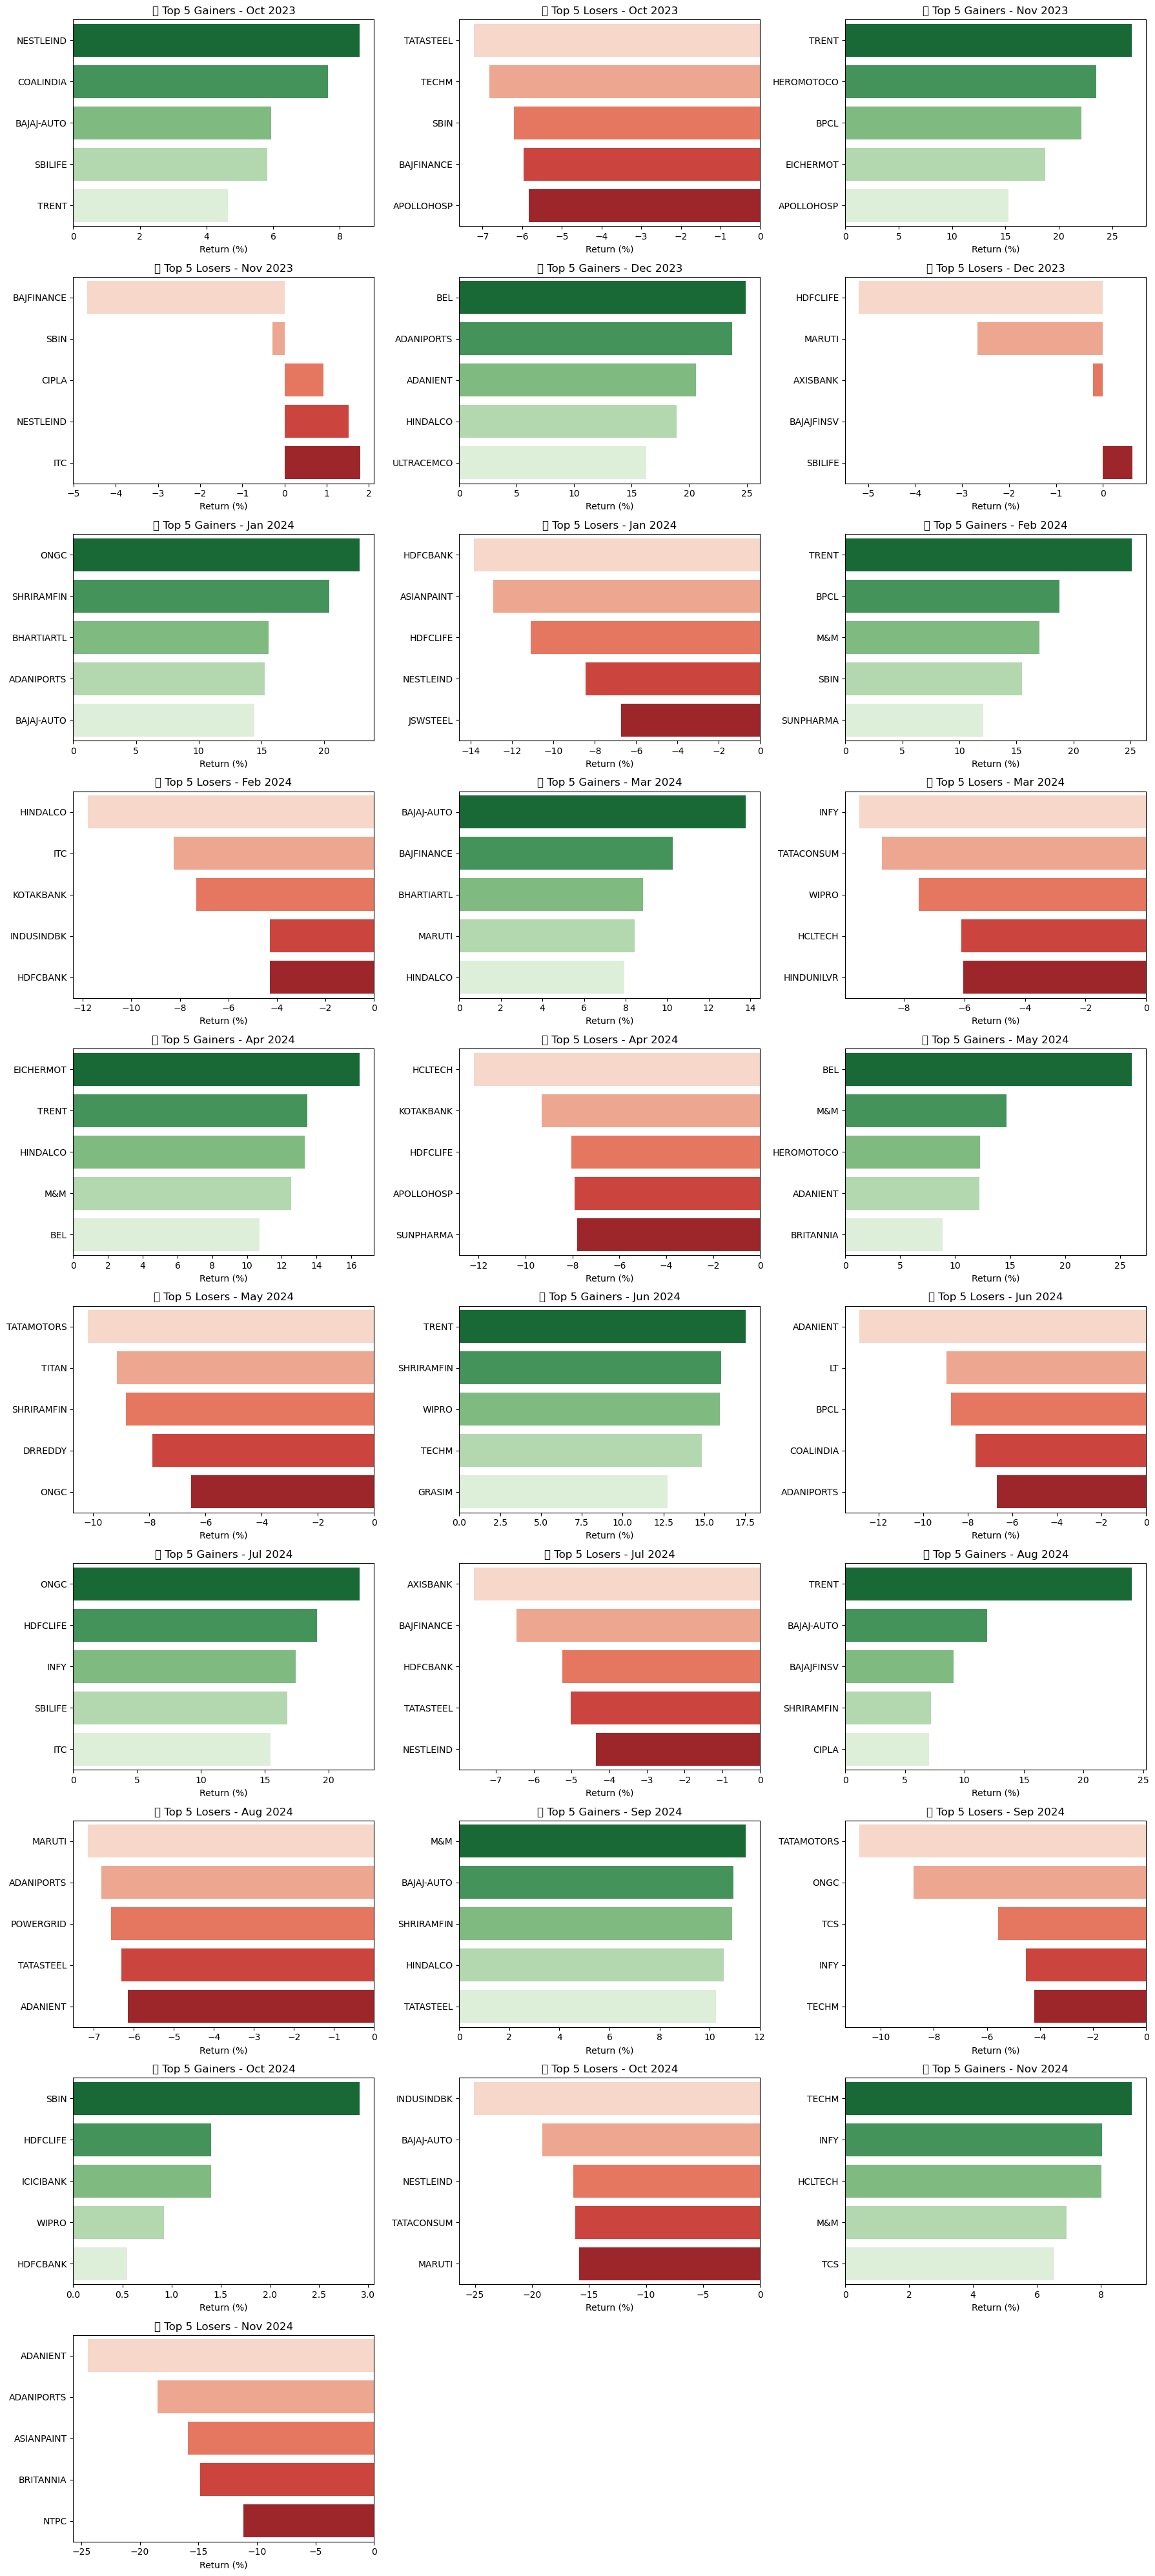

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === STEP 1: Prepare and structure data ===
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['stock_name', 'date'])

# Extract year and month
df['year_month'] = df['date'].dt.to_period('M')

# === STEP 2: Calculate monthly returns ===
monthly_returns = df.groupby(['stock_name', 'year_month']).agg(
    first_close=('close', 'first'),
    last_close=('close', 'last')
).reset_index()

monthly_returns['monthly_return'] = (
    (monthly_returns['last_close'] - monthly_returns['first_close']) / monthly_returns['first_close']
) * 100

# Convert year_month back to datetime for plotting
monthly_returns['year_month'] = monthly_returns['year_month'].dt.to_timestamp()

# === STEP 3: Plot Top 5 Gainers and Losers for each month ===
unique_months = monthly_returns['year_month'].drop_duplicates().sort_values()
n_months = len(unique_months)
cols = 3
rows = (n_months * 2 + cols - 1) // cols  # Two charts per month: gainers + losers

plt.figure(figsize=(18, rows * 4))

plot_num = 1
for month in unique_months:
    month_data = monthly_returns[monthly_returns['year_month'] == month]

    # Top 5 Gainers
    top_gainers = month_data.sort_values(by='monthly_return', ascending=False).head(5)
    plt.subplot(rows, cols, plot_num)
    sns.barplot(x='monthly_return', y='stock_name', data=top_gainers, palette='Greens_r')
    plt.title(f"📈 Top 5 Gainers - {month.strftime('%b %Y')}")
    plt.xlabel('Return (%)')
    plt.ylabel('')
    plot_num += 1

    # Top 5 Losers
    top_losers = month_data.sort_values(by='monthly_return').head(5)
    plt.subplot(rows, cols, plot_num)
    sns.barplot(x='monthly_return', y='stock_name', data=top_losers, palette='Reds')
    plt.title(f"📉 Top 5 Losers - {month.strftime('%b %Y')}")
    plt.xlabel('Return (%)')
    plt.ylabel('')
    plot_num += 1

plt.tight_layout()
plt.show()


In [17]:
import pandas as pd

sector_df = pd.read_csv("C:/Users/dilan/Desktop/guvi_project/Untitled Folder/Sector_data - Sheet1.csv")
stocks_df = pd.read_csv("C:/Users/dilan/Desktop/guvi_project/Untitled Folder/merged_stocks.csv")
sector_perf_df = pd.read_csv("C:/Users/dilan/Desktop/guvi_project/Untitled Folder/sector_performance_summary.csv")

# Extract actual symbol from 'Symbol' column
# Format: "ADANI ENTERPRISES: ADANIGREEN" -> extract 'ADANIGREEN'
sector_df[['company_clean', 'symbol_extracted']] = sector_df['Symbol'].str.split(':', expand=True)
sector_df['symbol_extracted'] = sector_df['symbol_extracted'].str.strip()
stocks_df['stock_name'] = stocks_df['stock_name'].str.strip()

# Merge merged_stocks with sector_data on symbol
merged = pd.merge(stocks_df, sector_df, left_on='stock_name', right_on='symbol_extracted', how='left')

# Merge with sector performance data
final_df = pd.merge(merged, sector_perf_df, on='sector', how='left')

# Save final output
final_df.to_csv("final_combined_datasetss.csv", index=False)
final_df.head()


,close,date,high,low,month,open,volume,stock_name,COMPANY,sector,Symbol,company_clean,symbol_extracted,yearly_return
0,2387.25,2023-10-03 05:30:00,2424.90,2372.00,2023-10,2418.00,2019899,ADANIENT,NaN,NaN,NaN,NaN,NaN,NaN
1,2464.95,2023-10-04 05:30:00,2502.75,2392.25,2023-10,2402.20,2857377,ADANIENT,NaN,NaN,NaN,NaN,NaN,NaN
2,2466.35,2023-10-05 05:30:00,2486.50,2446.40,2023-10,2477.95,1132455,ADANIENT,NaN,NaN,NaN,NaN,NaN,NaN
3,2478.10,2023-10-06 05:30:00,2514.95,2466.05,2023-10,2466.35,1510035,ADANIENT,NaN,NaN,NaN,NaN,NaN,NaN
4,2442.60,2023-10-09 05:30:00,2459.70,2411.30,2023-10,2440.00,1408224,ADANIENT,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
final_df.info


<bound method DataFrame.info of          close                 date     high      low    month     open  \
0      2387.25  2023-10-03 05:30:00  2424.90  2372.00  2023-10  2418.00   
1      2464.95  2023-10-04 05:30:00  2502.75  2392.25  2023-10  2402.20   
2      2466.35  2023-10-05 05:30:00  2486.50  2446.40  2023-10  2477.95   
3      2478.10  2023-10-06 05:30:00  2514.95  2466.05  2023-10  2466.35   
4      2442.60  2023-10-09 05:30:00  2459.70  2411.30  2023-10  2440.00   
...        ...                  ...      ...      ...      ...      ...   
14195   566.70  2024-11-14 05:30:00   574.55   564.20  2024-11   568.95   
14196   552.85  2024-11-18 05:30:00   566.70   540.30  2024-11   566.70   
14197   562.00  2024-11-19 05:30:00   569.80   554.70  2024-11   556.00   
14198   557.15  2024-11-21 05:30:00   567.60   555.30  2024-11   562.00   
14199   571.65  2024-11-22 05:30:00   573.60   557.90  2024-11   561.95   

        volume stock_name COMPANY    sector        Symbol company_c

In [21]:
final_df.dtypes

close               float64
date                 object
high                float64
low                 float64
month                object
open                float64
volume                int64
stock_name           object
COMPANY              object
sector               object
Symbol               object
company_clean        object
symbol_extracted     object
yearly_return       float64
dtype: object